In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('deliveries.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [5]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [12]:
df['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [17]:
df['batsman'].value_counts()

V Kohli           3494
G Gambhir         3433
SK Raina          3369
RG Sharma         3274
S Dhawan          3005
                  ... 
Sunny Gupta          1
LH Ferguson          1
NJ Rimmington        1
DP Vijaykumar        1
V Pratap Singh       1
Name: batsman, Length: 461, dtype: int64

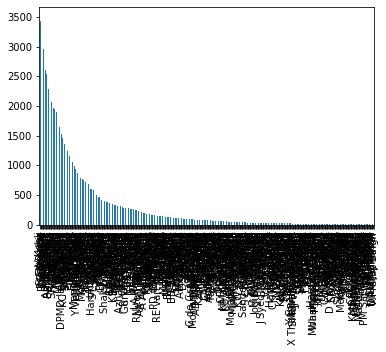

In [18]:
plt.figure()
df['batsman'].value_counts().plot(kind ='bar')
plt.show()

In [19]:
df['bowler'].unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C d

In [21]:
df['bowler'].value_counts()

Harbhajan Singh     2989
A Mishra            2703
SL Malinga          2694
P Kumar             2637
PP Chawla           2594
                    ... 
Y Gnaneswara Rao       6
SA Yadav               6
F du Plessis           6
SPD Smith              2
AC Gilchrist           1
Name: bowler, Length: 356, dtype: int64

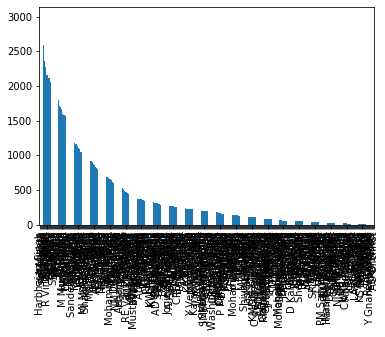

In [22]:
plt.figure()
df['bowler'].value_counts().plot(kind ='bar')
plt.show()

In [23]:
df['fielder'].unique()

array([nan, 'Mandeep Singh', 'Sachin Baby', 'DA Warner', 'BCJ Cutting',
       'Yuvraj Singh', 'MC Henriques', 'CJ Jordan (sub)', 'MS Dhoni',
       'R Bhatia', 'MA Agarwal', 'RG Sharma', 'N Rana', 'TG Southee',
       'YK Pathan', 'Kuldeep Yadav', 'MP Stoinis', 'M Vohra',
       'GJ Maxwell', 'MK Tiwary', 'BA Stokes', 'SV Samson', 'RR Pant',
       'SW Billings', 'S Nadeem', 'CH Morris', 'B Stanlake', 'STR Binny',
       'S Dhawan', 'V Shankar (sub)', 'NV Ojha', 'Rashid Khan',
       'BB McCullum', 'MJ McClenaghan', 'HH Pandya', 'KA Pollard',
       'RV Uthappa', 'R Dhawan (sub)', 'SP Narine', 'WP Saha', 'KK Nair',
       'A Mishra', 'PA Patel', 'B Kumar', 'G Gambhir', 'MK Pandey',
       'CR Woakes', 'SA Yadav', 'AR Patel', 'JC Buttler', 'JJ Bumrah',
       'CH Gayle', 'S Aravind', 'AB de Villiers', 'SK Raina', 'AJ Finch',
       'Ishan Kishan', 'RD Chahar', 'C de Grandhomme', 'EJG Morgan',
       'DA Miller', 'MM Sharma', 'Z Khan', 'KH Pandya', 'JJ Roy',
       'KD Karthik', 'RA Jad

In [24]:
df['fielder'].value_counts()

KD Karthik         127
MS Dhoni           126
RV Uthappa         115
AB de Villiers     101
SK Raina            96
                  ... 
T Mishra             1
B Stanlake           1
Umar Gul             1
BAW Mendis           1
UBT Chand (sub)      1
Name: fielder, Length: 451, dtype: int64

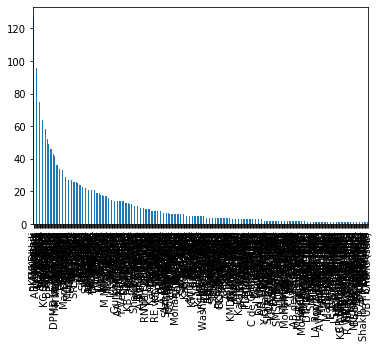

In [25]:
plt.figure()
df['fielder'].value_counts().plot(kind ='bar')
plt.show()